###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, T. Meier and R. Hartmann, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Vibroseismik und Korrelationsfilter

Als erstes Anwendungsbeispiel der AKF und KKF in der Geophysik analysieren wir das Konzept des Vibroseismikverfahrens anhand von synthetischen Zeitreihen und Felddaten. 

## Grundlagen der Vibroseismik

Als Alternative zur Sprengseismik und Impaktquellen, wie Hammer oder Fallgewicht, wurde in den 1950er Jahren die **Vibroseismik** im Kontext der Erdölexploration eingeführt. 

Als seismische Quelle dienen Vibroseisfahrzeuge. Diese bestehen aus einer Kombination von großer Masse und einer hydraulich betriebenen Rüttelplatte.

<img src="images/vibro_web.jpg" style="width: 800px;"/>

Die Vibroseisquelle speist ein frequenzmoduliertes Sweepsignal $x(t)$ im Frequenzbereich $f\in[f_1,f_2]$:

\begin{equation}
x(t)=
\begin{cases}
\sin\left(2\pi\left(f_{1}+\frac{f_{2}-f_{1}}{T}t\right)t\right)&:t\in[0,T]\\
0&:\text{ sonst}
\end{cases}
\notag
\end{equation}

mit der Periode $T$ in den Boden ein. Als Beispiel berechnen wir ein Sweepsignal mit den Eigenschaften:

$f_1 = 10\; Hz$, $f_2 = 100\; Hz$, $T = 10\;s$

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
import numpy                      # Bibliothek NumPy
from gsv.gsv_func import *        # Bibliothek "Geophysikalische Signalverarbeitung"

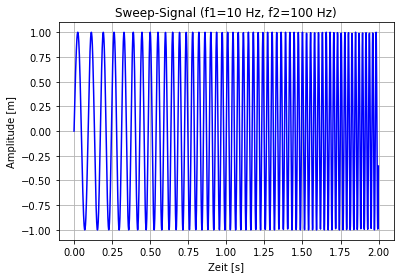

In [3]:
# Definiere Sweep
# ---------------
f1 = 10.0                             # minimale Sweep Frequenz f1
f2 = 100.0                            # maximale Sweep Frequenz f2
T = 10.0                              # Sweeplänge [s]
time, sweep = create_sweep(f1,f2,T)   # Erzeuge Sweep-Signal

# Plotte Sweep-Signal bis maximal 2 s
nt_max = (int)(2.0 / (time[1]-time[0]))
draw_func1(time[0:nt_max],sweep[0:nt_max],'Sweep-Signal (f1=10 Hz, f2=100 Hz)', 'Zeit [s]', 'Amplitude [m]')

Das Spektrum der AKF hat dann die Form:

\begin{equation}
\mathfrak{F}\{\rho_{x,x}(\tau)\}=X(f)^{\ast} X(f)\approx
\begin{cases}
1&:f\in[f_{1},f_{2}]\\
0&:\text{ sonst}
\end{cases}
\notag
\end{equation}

Die AKF des Sweeps läßt sich folgendermaßen approximieren

\begin{equation}
\rho_{x,x}(\tau)\approx\frac{\sin(\pi(f_{2}-f_{1})\tau)}{\pi(f_{2}-f_{1})\tau}\cdot\cos(2\pi(\frac{f_{1}+f_{2}}{2})\tau)
\notag
\end{equation}

Hierbei bezeichnet der erste Term eine Amplitudenmodulation und der zweite Term eine Schwingung mit der Trägerfrequenz $(f_{1}+f_{2})/2$.

D:\Lectures\Geophysikalische_Signalanalyse\lecture\Geophys-Signalanalyse\gsv\gsv_func.py:287: RuntimeWarning: invalid value encountered in true_divide
  AKF_an = (np.sin(k) / k) * np.cos(k1)


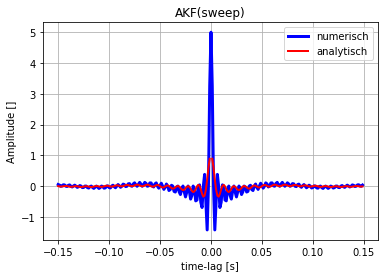

In [4]:
# AKF des Sweepsignals
AKF_sweep = np.correlate(sweep, sweep, mode='same')

# Multipliziere mit KKF_sweep mit dt um korrekte Amplituden zu erhalten
dt = time[1] - time[0]
AKF_sweep = AKF_sweep * dt

# Berechne time-lags
nt = (int)(len(time))
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF des Sweeps bis +- 0.15 s
nth = (int)(len(time) / 2)
nt_AKF = (int)(0.15 / dt)
nt1 = nth - nt_AKF
nt2 = nth + nt_AKF
comp_AKF_sweep(lags[nt1:nt2],AKF_sweep[nt1:nt2],f1,f2,T,'AKF(sweep)','time-lag [s]', 'Amplitude []')

Aus dem Unschärfetheorem 

\begin{equation*}
2\pi = \frac{\Delta \omega\Delta T}{2} 
\end{equation*}


folgt für die effektive Länge von $\rho_{x,x}(t)$:

\begin{equation*}
4\pi=(\omega_{2}-\omega_{1})\Delta T
\end{equation*}

oder 

\begin{equation*}
\Delta T=\frac{2}{f_{2}-f_{1}}<<T
\end{equation*}

Das bedeutet, ein breitbandiger Sweep erhöht die zeitliche Auflösung der AKF. Die zeitliche Auflösung der AKF des Sweeps $\rho_{x,x}$ ist wesentlich höher als die Länge $T$ des Sweeps selbst.

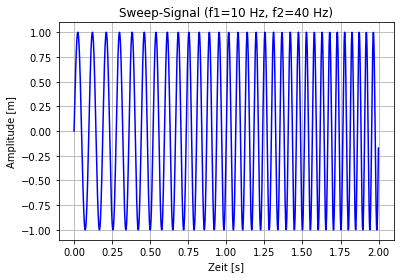

In [5]:
# Definiere Sweep mit geringerer Bandbreite
# -----------------------------------------
f1 = 10.0                             # minimale Sweep Frequenz f1
f2 = 40.0                             # maximale Sweep Frequenz f2
T = 10.0                              # Sweeplänge [s]
time, sweep1 = create_sweep(f1,f2,T)  # Erzeuge Sweep-Signal

# Plotte Sweep-Signal mit geringerer Bandbreite
draw_func1(time[0:nt_max],sweep1[0:nt_max],'Sweep-Signal (f1=10 Hz, f2=40 Hz)', 'Zeit [s]', 'Amplitude [m]')

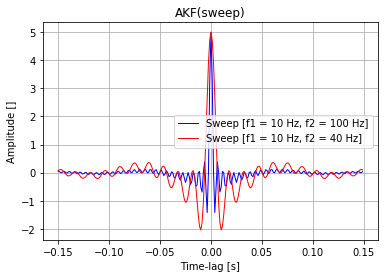

In [6]:
# AKF des Sweepsignals mit geringerer Bandbreite
AKF_sweep1 = np.correlate(sweep1, sweep1, mode='same')

# Multipliziere mit KKF_sweep mit dt um korrekte Amplituden zu erhalten
AKF_sweep1 = AKF_sweep1 * dt

# AKFs von Sweeps mit unterschiedlicher Bandbreite
comp_AKF_sweep1(lags[nt1:nt2],AKF_sweep[nt1:nt2],AKF_sweep1[nt1:nt2],'AKF(sweep)','Time-lag [s]', 'Amplitude []')

## Synthetisches Datenbeispiel

Um das Konzept des Vibroseismikverfahren zu veranschaulichen, erzeugen wir einen synthetischen Datensatz. Für ein 1D Medium lässt sich über einfache Laufzeitberechnungen und mit Hilfe von Transmissions- und Reflexionskoeffizienten die **Spike-Response** oder **Greens Funktionen** des Untergrundmodells berechnen (siehe Seismik-Vorlesung). 

Betrachten wir folgende Spike-Response für zwei Schichten über einem Halbraum Modell

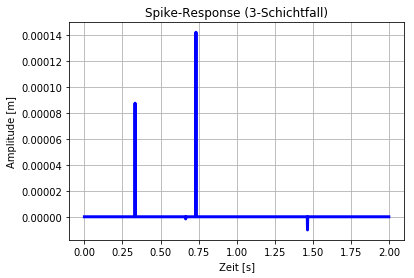

In [7]:
# Erzeuge Spike Response
green = create_spike_3_layers(time)

# Plotte Spike Response
draw_func(time[0:nt_max],green[0:nt_max],'Spike-Response (3-Schichtfall)', 'Zeit [s]', 'Amplitude [m]')

Die Spike-Response zeigt zwei positive Spikes, welche den primären Reflexionen der ersten bzw. zweiten Schichtgrenze entspricht. Die negativen Spikes sind die dazugehörigen multiplen Reflexionen. Die Faltung der Spike-Response $R$ mit dem Vibroseis-Signal $S$ ergibt aufgrund des **Representationstheorems** das synthetische Vibroseismogramm $x_{vib}$

$$  x_{vib} = S * R$$

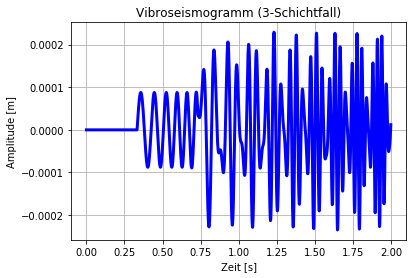

In [8]:
# Faltung des Quellsignals mit der Spikeresponse
xvib = np.convolve(sweep,green) 
nt = (int)(len(time))
xvib = xvib[0:nt]

# Plotte Spike Response
draw_func(time[0:nt_max],xvib[0:nt_max],'Vibroseismogramm (3-Schichtfall)', 'Zeit [s]', 'Amplitude [m]')

In dem Vibroseismogramm sind keine Reflexionseinsätze identifizierbar. Um diese Einsätze herauszuprozessieren, berechnen wir die KKF des Vibroseismogramms mit dem Sweep

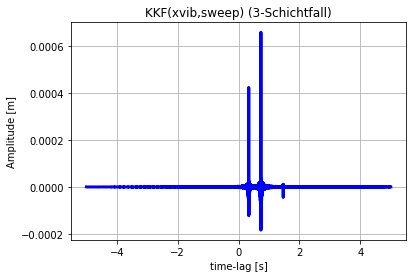

In [9]:
# KKF von Vibroseismogramm und Sweep
KKF_sweep_vibro = np.correlate(xvib,sweep, mode='same') * dt

# Plotte KKF von Vibroseismogramm und Sweep
draw_func(lags,KKF_sweep_vibro,'KKF(xvib,sweep) (3-Schichtfall)', 'time-lag [s]', 'Amplitude [m]')

Bei positiven time-lags sind einige Korrelationen erkennbar. Schauen wir uns diese genauer an und vergleichen sie mit der Spike-Response:

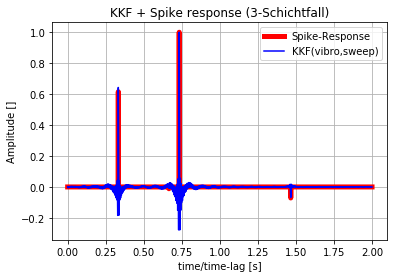

In [10]:
# Plotte KKF von Vibroseismogramm mit Sweep für positive time-lags bis 2 s
nth = (int)(nt/2)
draw_func2(lags[nth:nth+nt_max],KKF_sweep_vibro[nth:nth+nt_max],green[0:nt_max],'KKF + Spike response (3-Schichtfall)', 'time/time-lag [s]', 'Amplitude []')

Die (multiplen) Reflexionseinsatzzeiten in der Spike-Response fallen zusammen mit ausgeprägten lokalen Maxima und Minima in der KKF zwischen Vibroseismogramm und Sweep bei den entsprechenden time-lags. Die Wellenform der Reflexionseinsätze entspricht der AKF des Sweeps.  

Aber wie robust ist das Verfahren gegenüber Noise? Addieren wir etwas Noise auf das Vibroseismogramm, korrelieren es erneut mit dem Sweep und vergleichen das Ergebnis wieder mit der Spike-Response:

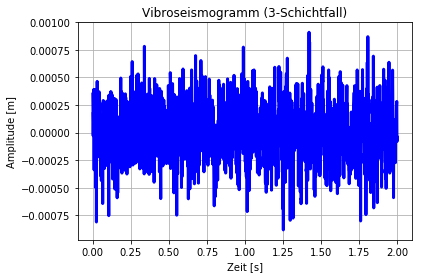

In [11]:
# Erzeuge normalverteiltes Rauschen 
noise_amp = 1.
noise = np.random.normal(0,noise_amp,len(time))

# Addiere normalverteilten Noise auf das Vibroseismogramm
xvib_noise = xvib + noise * np.amax(xvib)

# Plotte Vibroseismogramm mit Noise
draw_func(time[0:nt_max],xvib_noise[0:nt_max],'Vibroseismogramm (3-Schichtfall)', 'Zeit [s]', 'Amplitude [m]')

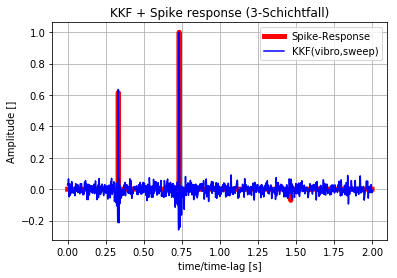

In [12]:
# KKF von Vibroseismogramm und Sweep
KKF_sweep_vibro_noise = np.correlate(xvib_noise,sweep, mode='same') * dt

# Plotte KKF von verrauschtem Vibroseismogramm mit Sweep für positive time-lags bis 2 s
nth = (int)(nt/2)
draw_func2(lags[nth:nth+nt_max],KKF_sweep_vibro_noise[nth:nth+nt_max],green[0:nt_max],'KKF + Spike response (3-Schichtfall)', 'time/time-lag [s]', 'Amplitude []')

Selbst bei stark verrauschten Daten zeigt die KKF des Vibroseismogramms mit dem Sweep immernoch deutliche Maxima an den Einsatzzeiten der dominanten Reflexionen. Mal schauen wie gut die Vibroseismik bei einer Felddatenanwendung funktioniert.

## Feldatenbeispiel: Surendorf

Im Rahmen des [ANGUS-II Projekts](http://www.angus2.de/de) wurden Anfang Mai 2019 in Surendorf, südlich der Eckernförder Bucht in Schleswig-Holstein, aktive seismische Daten mit einer Vibroseismikquelle und einem Fallgewicht gemessen. 

<img src="images/surendorf_overview.jpg" style="width: 800px;"/>

Ziel war die Kartierung potentieller tiefer Störungszonen, die während früherer mariner und landseismischer Messung mit klassischem seismischen Prozessing nachgewiesen wurden [(Al Hseinat et al. 2016)](https://www.researchgate.net/publication/302231461_Triassic_to_recent_tectonic_evolution_of_a_crestal_collapse_graben_above_a_salt-cored_anticline_in_the_Gluckstadt_GrabenNorth_German_Basin). Die neuen Datensätze sind speziell dafür ausgelegt, um mit einer seismischen Fullwaveform Inversion (FWI) hochauflösende Modelle der elastischen Materialparameterverteilung im Untergrund herleiten zu können.

Importieren wir als Beispiel das von 10 - 80 Hz bandpassgefilterten Sweep-Signal, sowie das Vibroseismogramm von Kanal 68 (Schuss 50):

In [13]:
# Importiere Sweep ...
sweep = np.loadtxt('data/surendorf/sweep_10_80_le.txt', delimiter='\t', skiprows=0, unpack='False')

# ... und Vibroseismogramm
vibroseis = np.loadtxt('data/surendorf/raw50_traf68_le.txt', delimiter='\t', skiprows=0, unpack='False')

# Definiere Sample Intervall dt = 1 ms
dt = 0.001

# Bestimme Länge der Zeitreihen
print("nt_sweep = ",len(sweep))
print("nt_vibroseis = ",len(vibroseis))

nt_sweep =  10001
nt_vibroseis =  15120


Wie man sieht sind der Sweep und das Vibroseismogramm unterschiedlich lang, so daß wir als erstes das kürzere Sweepsignal zero-padden:

In [14]:
# Initialisiere neuen Sweep Vektor
sweep_new = np.zeros(len(vibroseis))

# Kopiere alten Sweep Vektor in neuen Sweep Vektor
sweep_new[0:len(sweep)] = sweep[0:len(sweep)]

# Bestimme Länge des neuen sweeps
print("nt_sweep_new = ",len(sweep_new))

nt_sweep_new =  15120


Der Zeitvektor läßt sich aus dem Sampleintervall $dt$ und der Zahl der Samples $nt$ berechnen:

In [15]:
# Definiere Zeit-Vektor
nt = (int)(len(sweep_new))
time1 = np.arange(0,nt*dt,dt)

Damit ergibt sich folgendes Sweep-Signal

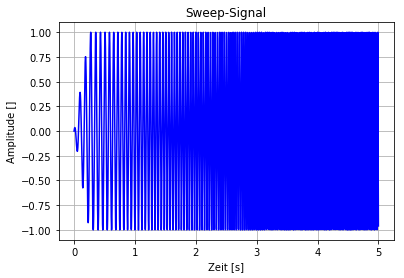

In [16]:
# Plotte Sweep-Signal
draw_func1(time1[0:5000],sweep_new[0:5000],'Sweep-Signal', 'Zeit [s]', 'Amplitude []')

dessen Spektrum einen Frequenzbereich von 10 - 80 Hz abdeckt, welches durch den angewendeten Bandpassfilter beschränkt ist:

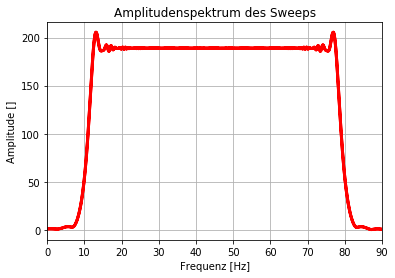

In [17]:
# Plotte Amplitudenspektrum
fmax = 90.   # maximale Frequenz
plot_spec(time1,sweep_new,fmax,'Amplitudenspektrum des Sweeps','Frequenz [Hz]','Amplitude []')

Die AKF des Sweep Signals ergibt sich zu

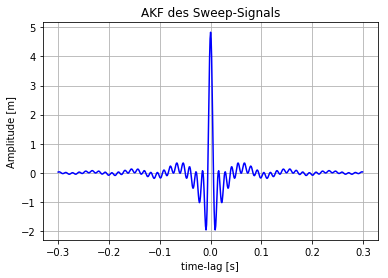

In [18]:
# AKF des Sweepsignals
AKF_sweep_new = np.correlate(sweep_new, sweep_new, mode='same')

# Multipliziere mit KKF_sweep mit dt um korrekte Amplituden zu erhalten
dt = time1[1] - time1[0]
AKF_sweep_new = AKF_sweep_new * dt

# Berechne time-lags
nt = (int)(len(time1))
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF des Sweeps
wnt = 300
nth = (int)(nt/2)
draw_func1(lags[nth-wnt:nth+wnt],AKF_sweep_new[nth-wnt:nth+wnt],'AKF des Sweep-Signals', 'time-lag [s]', 'Amplitude [m]')

In dem Vibroseismogramm sind Einsätze unterschiedlicher seismischer Phasen nicht erkennbar:

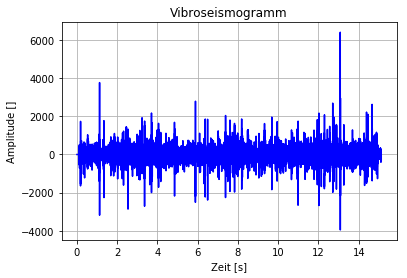

In [19]:
# Plotte Vibroseismogramm
draw_func1(time1,vibroseis,'Vibroseismogramm', 'Zeit [s]', 'Amplitude []')

Schließlich folgt die Korrelation des Sweeps mit dem Vibroseismogramm mit der NumPy Funktion `correlate`

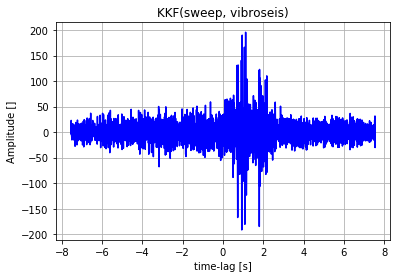

In [20]:
# KKF des Sweeps mit dem Vibroseismogramm
KKF_sweep = np.correlate(sweep, vibroseis, mode='same')

# Multipliziere mit KKF_sweep mit dt um korrekte Amplituden zu erhalten
KKF_sweep = KKF_sweep * dt

# Berechne time-lags
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte KKF von Sweep mit Vibroseismogramm
draw_func1(lags,KKF_sweep,'KKF(sweep, vibroseis)', 'time-lag [s]', 'Amplitude []')

Man beachte die starke Korrelation bei positiven time-lags. Schauen wir uns diese genauer an:

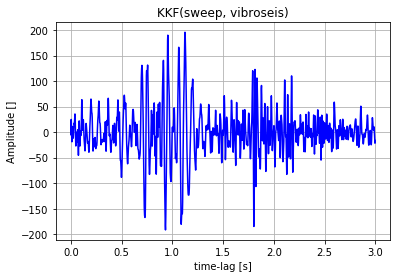

In [21]:
# Plotte KKF von Sweep mit Vibroseismogramm für positive time-lags
nt1 = 3000
nth = (int)(nt/2)
draw_func1(lags[nth:nth+nt1],KKF_sweep[nth:nth+nt1],'KKF(sweep, vibroseis)', 'time-lag [s]', 'Amplitude []')

Bei 0.36 s befindet sich der Ersteinsatz, zwischen 0.4 - 1.2 s einige Reflexionen und ab ca. 1.4 s Oberflächenwellen. Im Gegensatz zum synthetischen Beispiel korreliert der Sweep teilweise mit Noise, so daß die Reflexionseinsätze und der Ersteinsatz nicht ganz so deutlich identifiziert werden können.

## Korrelationsfilter (Matched Filter)

Im Folgenden soll eine verrauschten Zeitreihe betrachtet werden, die ein bekanntes Signal $s_j$ enthält: $x_j=a s_{j-t}+n_j$. Die Amplitude $a$ und die Zeitverschiebung $t$ sind unbekannt und gesucht. Es soll also ein bekanntes Signal in einer verrauschten Zeitreihe detektiert werden. Diese Aufgabe kann man mittels eines sogenannten ''matched filter'' lösen, indem die KKF der verrauschten Zeitreihe $\{x_j\}$ mit dem bekannten Signal $\{s_j\}$ analysiert wird. 

Für die KKF $\rho_{s,x}(i)$ folgt:

\begin{equation}
\begin{split}
\rho_{s,x}(i)&=\sum\limits_{j}s_{j}x_{j+i}=a \sum\limits_{j}s_{j}s_{j+i-t}+\sum\limits_{j}s_{j}n_{j+i}\\
&=a\rho_{s,s}(i-t)+\rho_{s,n}(i.)
\end{split}
\notag
\end{equation}

Die KKF ist also die Überlagerung der AKF des bekannten Signals mit der KKF zwischen dem Signal und dem Rauschen. Die AKF ist mit dem Faktor $a$ gewichtet und um $t$ zeitverschoben. Die gesuchte Zeitverschiebung wird durch die maximale Amplitude der AKF angezeigt, wobei der maximale Wert positiv oder negativ sein kann in Abhängigkeit davon, ob $a$ positiv oder negativ ist. Durch die Kreuzkorrelation des Signals mit dem Rauschen wird das Rauschen unterdrückt. Das Singal-Rausch-Verhältnis aus maximaler Signalamplitude zu mittlerer Rauschleistung 

\begin{equation}
\mathrm{SNR}=\frac{\text{maximale Signalamplitude}}{\text{mittlere Rauschleistung } \sigma_{s,n}}
\notag
\end{equation}

wird optimiert.

Eine Anwendung ist die Berechnung des Korrelogramms im Fall der Vibroseismik. Das Signal (der Sweep) ist bekannt. Deshalb wird die registrierte seismische Spur, in der die Reflexionen durch sich überlagernde Sweeps angezeigt werden, mit dem Sweep korreliert. Ist das Spektrum der seismischen Spur $Y(\omega) = R(\omega) S(\omega)$, wobei $R(\omega)$ das Spektrum der Reflektivität und $S(\omega)$ das Spektrum des Sweeps sind, folgt für das Spektrum der KKF:

\begin{equation}
\begin{split}
\mathfrak{F}\{\rho_{s,y}(\tau)\}&=S^{\ast}(\omega)\left(R(\omega)S(\omega)+N(\omega)\right)\\
&=R(\omega) S^{\ast}(\omega)S(\omega)+S^{\ast}(\omega)N(\omega)\\
&=R(\omega) \mathfrak{F}\{\rho_{s,s}(\tau)\} + \mathfrak{F}\{\rho_{s,n}(\tau)\}.
\end{split}
\notag
\end{equation}

Damit folgt im Zeitbereich, dass das Korrelogramm die Faltung der Reflektivität mit der AKF des Sweeps ist

\begin{equation}
\rho_{s,y}(\tau)=r(\tau)\ast\rho_{s,s}(\tau) + \rho_{s,n}(\tau).
\notag
\end{equation}

Die Reflexionen werden somit durch die AKF des Sweeps angezeigt, die eine wesentlich bessere zeitliche Auflösung hat als der Sweep selbst. Bemerkenswert ist weiter, dass der Einsatz des Signals nicht im Rauschen untergeht, sondern durch die maximale Amplitude der AKF angezeigt wird. Da das Rauschen nur bedingt mit dem Sweep korreliert, wird das Rauschen durch den matched Filter unterdrückt.